In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

from newsapi import NewsApiClient

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/elizabethcomstock/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv("news_api_key")

In [4]:
# Create a newsapi client
news_api = NewsApiClient(api_key=news_api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_news = news_api.get_everything(
    q="bitcoin",
    language="en",
#    page_size=100,
    sort_by="relevancy"
)

In [6]:

# Print total articles
print(f"Total articles about Bitcoin: {btc_news['totalResults']}")

# Show sample article
btc_news["articles"][0]

Total articles about Bitcoin: 7273


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Paul Ford',
 'title': 'A Field Guide for Nature-Resistant Nerds',
 'description': 'Yes, yes, the dirt is horrifying. But it’s also how we make bitcoin apps.',
 'url': 'https://www.wired.com/story/a-field-guide-for-nature-resistant-nerds-microchips-climate-change/',
 'urlToImage': 'https://media.wired.com/photos/61086c497b8c62be3062fe82/191:100/w_1280,c_limit/WI090121_MG_Ford_01.jpg',
 'publishedAt': '2021-08-06T11:00:00Z',
 'content': 'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'}

In [9]:
# Fetch the Ethereum news articles
eth_news = news_api.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [10]:
# Print total articles
print(f"Total articles about Ethereum: {eth_news['totalResults']}")

# Show sample article
eth_news["articles"][0]

Total articles about Ethereum: 2764


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Connie Loizos',
 'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’',
 'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…',
 'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667',
 'publishedAt': '2021-07-16T16:00:55Z',
 'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]'}

In [11]:
eth_news["articles"][0]['description']

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…'

In [12]:
def create_df(news):
    cnt=0
    articles = []
    for article in news:
        try:
#            title = article["title"]
#            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            articles.append({
#                "title": title,
#                "description": description,
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            })
        except AttributeError:
            cnt=cnt+1
            print(cnt)
            pass

    return pd.DataFrame(articles), cnt

In [13]:
# Create the Bitcoin sentiment scores DataFrame
btc_sm_df, c1 = create_df(btc_news["articles"])

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_sm_df = btc_sm_df[cols]
btc_sm_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920
3,2021-08-12,"By Joe TidyCyber reporter \r\n""Follow the mone...",-0.8860,0.000,0.271,0.729
4,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873


In [14]:
len(btc_sm_df)

20

In [15]:
# Create the Ethereum sentiment scores DataFrame
eth_sm_df, c1 = create_df(eth_news["articles"])

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sm_df = eth_sm_df[cols]
eth_sm_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
2,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810
3,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861
4,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000


In [16]:
# Describe the Bitcoin Sentiment
btc_sm_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.063935,0.048700,0.033200,0.918100
std,0.410191,0.060552,0.066017,0.076228
min,-0.886000,0.000000,0.000000,0.729000
25%,-0.074000,0.000000,0.000000,0.868500
50%,0.000000,0.000000,0.000000,0.918500
75%,0.416125,0.091000,0.064500,1.000000
max,0.690800,0.178000,0.271000,1.000000


In [17]:
# Describe the Ethereum Sentiment
eth_sm_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.065888,0.048120,0.029920,0.921940
std,0.369311,0.059419,0.049396,0.071514
min,-0.757900,0.000000,0.000000,0.737000
25%,-0.063825,0.000000,0.000000,0.876750
50%,0.000000,0.000000,0.000000,0.926500
75%,0.345300,0.075500,0.064500,1.000000
max,0.750600,0.201000,0.177000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?
<li>
A: Eth

Q: Which coin had the highest compound score?
<li>
A: Eth

Q. Which coin had the highest positive score?
<li>
A: Eth! 

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elizabethcomstock/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
print(sw)

# Expand the default stopwords list if necessary
sw.add('tldr')


{'over', 'herself', 'y', 'was', 'here', 'then', "didn't", 'himself', 'it', 'were', 'and', "haven't", 'the', 'more', 'down', 've', 'i', 'through', 'theirs', 'than', 'those', 'until', 'did', "she's", 'do', 'most', 'shouldn', "isn't", "you're", 's', 'hadn', 'them', 'above', 'ours', "that'll", 'have', 'their', 'does', 'below', 'very', 'being', "you'll", 'where', 'my', 'against', 'both', 'she', "wasn't", 'own', 'at', 'after', "hasn't", 'with', 'once', 'some', 'doesn', "it's", 'between', 'how', 'nor', 'him', 'his', 'yours', 'you', 'under', 'out', 'themselves', 'weren', 'we', 'of', 'to', 'all', 'an', 'off', 'having', 'wasn', "you've", "doesn't", 'isn', 'needn', 'am', 'again', 'd', 'haven', "mustn't", 'on', 'as', 'itself', 'about', 'too', 'only', 'if', 'who', 'is', 'while', 'that', 'will', "don't", "aren't", 'can', "hadn't", 'ain', 'so', 'but', 'no', 'not', 'there', 'these', 'why', 'm', 't', 'myself', 'now', 'its', 'her', "couldn't", 'ma', 'in', 'be', 'shan', 'from', "shouldn't", 'wouldn', 'be

In [22]:
# checking words
type(sw)

set

In [24]:
# Test if the set is active
el_in_set = 'tldr' in sw
print(el_in_set)

True


In [25]:
# hmm...lets try to remove punctuation:
text1 = 'class starts at 630!! Hello!!!, he said ---and went.'
sw = set(stopwords.words('english'))
regex = re.compile("[^a-zA-Z0-9 ]")
re_clean1 = regex.sub('', text1)
re_clean1

'class starts at 630 Hello he said and went'

In [26]:

# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase

    
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]    
    
    return tokens

In [27]:
btc_sm_df['text']

0     When my wife started a little garden in our ur...
1     Like Dogecoin devotees, the mayor of Reno, and...
2     Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...
3     By Joe TidyCyber reporter \r\n"Follow the mone...
4     To get a roundup of TechCrunchs biggest and mo...
5     As longtime TechCrunch readers know well, Mich...
6     After the bell today, Coinbase reported anothe...
7     SINGAPORE, July 28 (Reuters) - Bitcoin broke a...
8     T-Mobile is grappling with yet another reporte...
9     Representations of cryptocurrency Bitcoin are ...
10    James Martin/CNET\r\nA UK man was arrested in ...
11    A representation of virtual currency bitcoin i...
12    By Reuters Staff\r\nFILE PHOTO: A representati...
13    REUTERS/Dado Ruvic/Illustration\r\nWelcome to ...
14    Representations of virtual currency bitcoin ar...
15    LONDON, July 20 (Reuters) - Bitcoin fell on Tu...
16    By Reuters Staff\r\nAmazon app is seen on a sm...
17    Posted \r\nTesla is likely to start taking

In [28]:
# Create a new tokens column for Bitcoin
tokens_btc = []
for index, row in btc_sm_df.iterrows():
    tokens = tokenizer(row['text'])
    tokens_btc.append(tokens)

In [31]:
len(tokens_btc)

20

In [32]:
btc_sm_df['tokens'] = tokens_btc

In [33]:
pd.set_option('display.max_colwidth', -1)
btc_sm_df.head()

<ipython-input-33-23ac0ad35612>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,date,text,compound,positive,negative,neutral,tokens
0,2021-08-06,"When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]",-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyard, could, think, worm, also, bug, dirt, course, filled, worm, bug, composted, corn, cob, 3499, char]"
1,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader, el, salvador, aldo, baoicchi, convinced, cryptocurrency, future, ceo, founder, canadian, scooter, maker, daymak, belief, 4116, char]"
2,2021-08-10,"Photo by Joe Raedle/Getty Images\r\n\n \n\n Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.\nOn Mond… [+2119 chars]",0.4019,0.080,0.000,0.920,"[photo, joe, raedlegetty, images, twitter, square, ceo, jack, dorsey, noted, superfan, bitcoin, claimed, monday, cryptocurrency, eventually, unite, world, yes, reallyon, mond, 2119, char]"
3,2021-08-12,"By Joe TidyCyber reporter \r\n""Follow the money"" - for generations it's been the mantra of investigators looking for criminals.\r\nIn the cyber-realm, this battle between criminals and the authorities ha… [+3786 chars]",-0.8860,0.000,0.271,0.729,"[joe, tidycyber, reporter, follow, money, generation, mantra, investigator, looking, criminalsin, cyberrealm, battle, criminal, authority, ha, 3786, char]"
4,2021-07-23,"To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\r\nHello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars]",0.6240,0.127,0.000,0.873,"[get, roundup, techcrunchs, biggest, important, story, delivered, inbox, every, day, 3, pm, pdt, subscribe, herehello, welcome, daily, crunch, july, 23, 2021, 5456, char]"


In [34]:
# Create a new tokens column for Ethereum
tokens_eth = []
for index, row in eth_sm_df.iterrows():
    tokens = tokenizer(row['text'])
#    print('***')
#    print(tokens)
    tokens_eth.append(tokens)


In [35]:
eth_sm_df['tokens'] = tokens_eth

In [36]:
# uhmm..lets see what we just did...
eth_sm_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-16,"There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]",0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, investor, developer, attention, right, big, daddy, ethereum, socalled, ethereum, killers, like, solana, wrote, 2563, char]"
1,2021-07-29,Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars],-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating, industry, fervor, brings, developer, user, space, still, feel, extremely, young, despite, heavy, institutional, embrace, crypto, 2468, char]"
2,2021-08-05,"Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars]",0.6956,0.190,0.000,0.810,"[cent, wa, founded, 2017, adfree, creator, network, allows, user, offer, crypto, reward, good, post, comment, like, gifting, award, reddit, ethereum, 6228, char]"
3,2021-08-10,"After the bell today, Coinbase reported another period of impressive results in its second quarter earnings report.\r\nDuring the quarter, Coinbase’s total revenue reached $2.23 billion, which helped t… [+4900 chars]",0.5719,0.139,0.000,0.861,"[bell, today, coinbase, reported, another, period, impressive, result, second, quarter, earnings, reportduring, quarter, coinbases, total, revenue, reached, 223, billion, helped, 4900, char]"
4,2021-08-05,"Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/IllustrationNEW YORK, Aug 5 (Reuters) - A maj… [+439 chars]",0.0000,0.000,0.000,1.000,"[representation, ethereum, virtual, currency, standing, pc, motherboard, seen, illustration, picture, february, 3, 2018, reutersdado, ruvicillustrationnew, york, aug, 5, reuters, maj, 439, char]"


In [37]:
# Create a new tokens column for Bitcoin
btc_sm_df['text'][0]

'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'

In [39]:
# Why am I getting gardening articles!? (>_<) A: Je ne'Sepa
tokens_btc[0]

['wife',
 'started',
 'little',
 'garden',
 'urban',
 'backyard',
 'could',
 'think',
 'worm',
 'also',
 'bug',
 'dirt',
 'course',
 'filled',
 'worm',
 'bug',
 'composted',
 'corn',
 'cob',
 '3499',
 'char']

In [40]:
# Ok. Lets try eth
eth_sm_df['text'][0]

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]'

In [41]:
# tokenize?
tokens_eth[0]

['many',
 'blockchain',
 'platform',
 'competing',
 'investor',
 'developer',
 'attention',
 'right',
 'big',
 'daddy',
 'ethereum',
 'socalled',
 'ethereum',
 'killers',
 'like',
 'solana',
 'wrote',
 '2563',
 'char']

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [43]:
# imports n such 
from collections import Counter
from nltk import ngrams

In [44]:
type(tokens_btc)

list

In [45]:
len(tokens_btc)

20

In [46]:
from pandas.core.common import flatten
tokens_btc_flat = list(flatten(tokens_btc))

In [47]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = Counter(ngrams(tokens_btc_flat, n=2))
print(dict(btc_bigram_counts))

{('wife', 'started'): 1, ('started', 'little'): 1, ('little', 'garden'): 1, ('garden', 'urban'): 1, ('urban', 'backyard'): 1, ('backyard', 'could'): 1, ('could', 'think'): 1, ('think', 'worm'): 1, ('worm', 'also'): 1, ('also', 'bug'): 1, ('bug', 'dirt'): 1, ('dirt', 'course'): 1, ('course', 'filled'): 1, ('filled', 'worm'): 1, ('worm', 'bug'): 1, ('bug', 'composted'): 1, ('composted', 'corn'): 1, ('corn', 'cob'): 1, ('cob', '3499'): 1, ('3499', 'char'): 1, ('char', 'like'): 1, ('like', 'dogecoin'): 1, ('dogecoin', 'devotee'): 1, ('devotee', 'mayor'): 1, ('mayor', 'reno'): 1, ('reno', 'leader'): 1, ('leader', 'el'): 1, ('el', 'salvador'): 1, ('salvador', 'aldo'): 1, ('aldo', 'baoicchi'): 1, ('baoicchi', 'convinced'): 1, ('convinced', 'cryptocurrency'): 1, ('cryptocurrency', 'future'): 1, ('future', 'ceo'): 1, ('ceo', 'founder'): 1, ('founder', 'canadian'): 1, ('canadian', 'scooter'): 1, ('scooter', 'maker'): 1, ('maker', 'daymak'): 1, ('daymak', 'belief'): 1, ('belief', '4116'): 1, ('41

In [48]:
# Generate the Ethereum N-grams where N=2
tokens_eth_flat = list(flatten(tokens_eth))
eth_bigram_counts = Counter(ngrams(tokens_eth_flat, n=2))
print(eth_bigram_counts)

Counter({('illustration', 'taken'): 21, ('taken', 'june'): 17, ('2021', 'reutersdado'): 14, ('char', 'representations'): 12, ('pc', 'motherboard'): 10, ('representations', 'cryptocurrencies'): 9, ('cryptocurrencies', 'bitcoin'): 9, ('bitcoin', 'ethereum'): 9, ('placed', 'pc'): 9, ('motherboard', 'illustration'): 9, ('june', '29'): 9, ('29', '2021'): 9, ('york', 'aug'): 8, ('aug', '5'): 7, ('5', 'reuters'): 7, ('new', 'york'): 7, ('poly', 'network'): 7, ('ethereum', 'dogecoin'): 7, ('dogecoin', 'ripple'): 7, ('ripple', 'litecoin'): 7, ('us', 'dollar'): 7, ('char', 'new'): 6, ('2021', 'reutersedgar'): 6, ('litecoin', 'placed'): 6, ('reuters', 'dollar'): 6, ('char', 'representation'): 5, ('reutersdado', 'ruvicillustrationnew'): 5, ('kong', 'aug'): 5, ('char', 'article'): 5, ('article', 'wa'): 5, ('wa', 'translated'): 5, ('translated', 'spanish'): 5, ('spanish', 'edition'): 5, ('edition', 'using'): 5, ('using', 'ai'): 5, ('ai', 'technology'): 5, ('technology', 'errors'): 5, ('errors', 'may

In [49]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [50]:
# Use token_count to get the top 10 words for Bitcoin
top10_btc = token_count(tokens_btc_flat, 10)
print(top10_btc)

[('char', 19), ('bitcoin', 11), ('reuters', 8), ('illustration', 6), ('taken', 6), ('reutersdado', 6), ('july', 5), ('2021', 5), ('seen', 5), ('cryptocurrency', 3)]


In [51]:
# Use token_count to get the top 10 words for Ethereum
top10_eth = token_count(tokens_eth_flat, 10)
print(top10_eth)


[('char', 100), ('ethereum', 33), ('reuters', 33), ('cryptocurrency', 31), ('bitcoin', 28), ('2021', 25), ('illustration', 23), ('taken', 22), ('aug', 21), ('reutersdado', 17)]


### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [53]:
# Imports once again
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [54]:
# BTC wordcloud
def listToString(s):
    # initialize an empty string
    str1 = " "
    # return string
    return (str1.join(s))

In [55]:
btc_string = listToString(tokens_btc_flat)

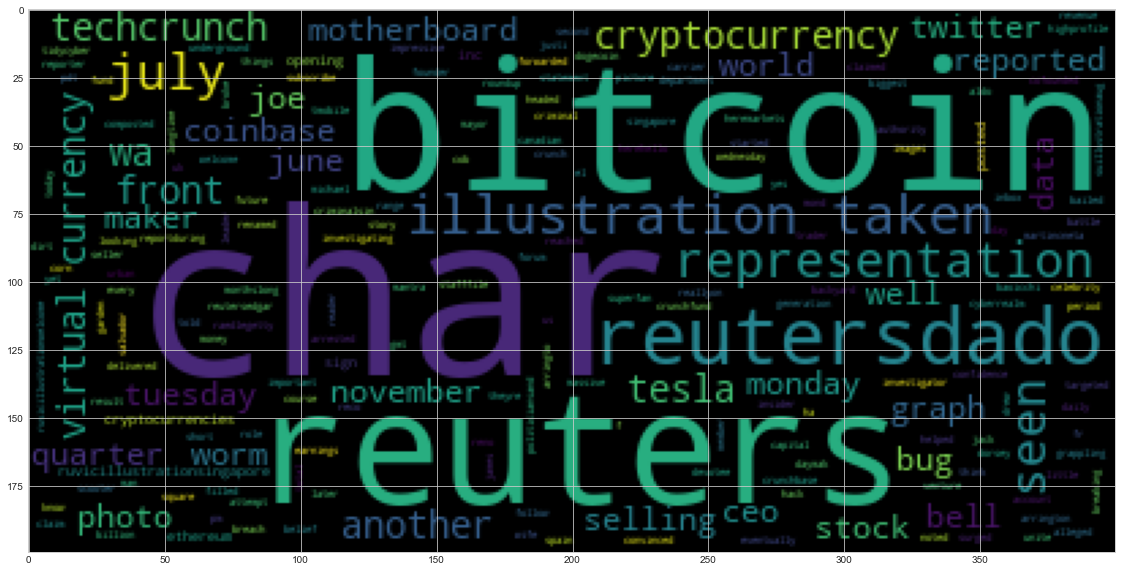

In [57]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(btc_string)
plt.imshow(wc);


In [58]:
# WHAOOW. super cool. 

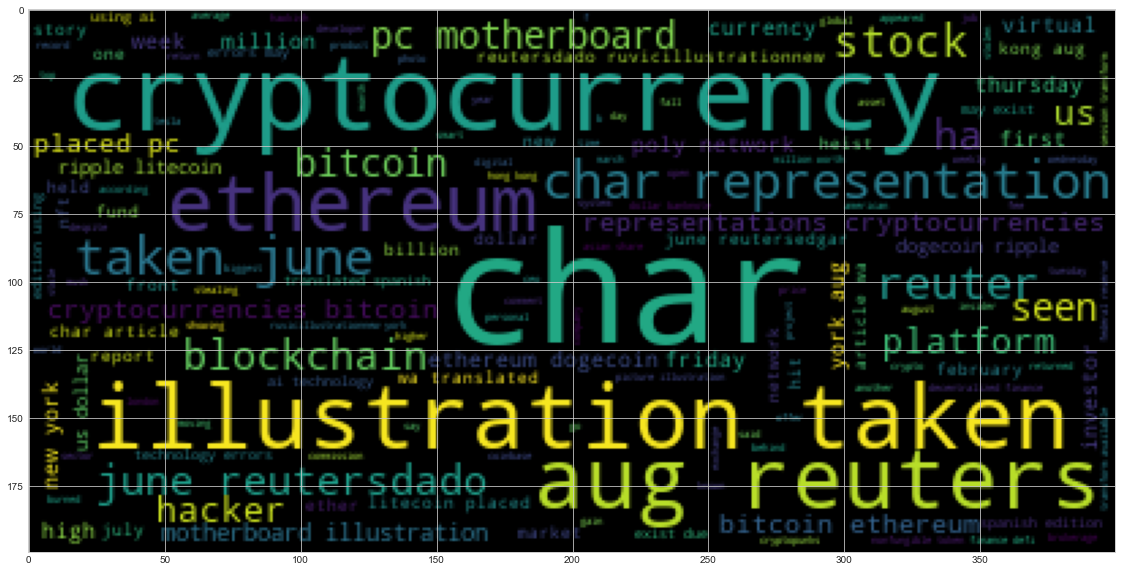

In [59]:
# Generate the Ethereum word cloud
eth_string = listToString(tokens_eth_flat)
wc = WordCloud().generate(eth_string)
plt.imshow(wc);

## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [61]:
# IMPORTS 
import spacy
from spacy import displacy

In [62]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [63]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

### Bitcoin NER

In [64]:
btc_text = ' '.join(btc_sm_df['text'])
eth_text = ' '.join(eth_sm_df['text'])

In [65]:
# Concatenate all of the Bitcoin text together
btc_text


'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars] Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars] Photo by Joe Raedle/Getty Images\r\n\n \n\n Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.\nOn Mond… [+2119 chars] By Joe TidyCyber reporter \r\n"Follow the money" - for generations it\'s been the mantra of investigators looking for criminals.\r\nIn the cyber-realm, this battle between criminals and the authorities ha… [+3786 chars] To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe he

In [66]:
# Run the NER processor on all of the text
doc = nlp(btc_text)
# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [67]:
!conda list spacy

# packages in environment at /Users/elizabethcomstock/opt/anaconda3:
#
# Name                    Version                   Build  Channel
spacy                     3.1.0                    pypi_0    pypi
spacy-legacy              3.0.8                    pypi_0    pypi


In [68]:
# Render the visualization
displacy.render(doc, style='ent')

### Ethereum NER

In [70]:
doc1 = nlp(eth_text)

In [71]:
doc1.user_data["title"] = "Ethereum NER"

In [72]:
displacy.render(doc1, style='ent')

In [73]:
# List all Entities
for ent in doc1.ents:
    print(ent.text, ent.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
2017 DATE
Reddit NORP
Ethereum PERSON
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
HONG KONG GPE
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
BBC News ORG
almost half CARDINAL
$600m MONEY
433 MONEY
Yesterday DATE
Anthony Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
More than $144 million MONEY
August 5 DATE
Sunday DATE
over 45,799 CARDINAL
second ORDINAL
Dado Ruvic PERSON
Reuters ORG
More than $144 million MONEY
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GP